# 逻辑回归案例一
- 数据集：/data/horseColicTraining.txt、/data/horseColicTest.txt
- 数据集类型：二分类数据集

In [5]:
## 导入需要的包
import numpy as np 
from numpy import *
import matplotlib.pyplot as plt 
import seaborn as snn 
import pandas as pd
import sklearn
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [22]:
# 定义 sigmoid 函数，为了防止计算机计算溢出，需要将sigmoid函数定义为以下形式
def sigmoid(x):
    if x>=0:
        return 1.0/(1+np.exp(-x))
    else:
        return np.exp(x)/(1+np.exp(x))

# 定义梯度下降法函数
def gradient1(x,y,initial_beta,learning_rate):
    shape = x.shape #获取数据的行数和列数
    rows = shape[0] #数据的行数
    cols = shape[1] #数据特征维数
    diff_matrix = np.zeros((1,cols)) #初始化数据集的梯度矩阵
    for  i in range(rows): # 遍历每一个样本数据
        temp_x = x[i,:] # 读取第i个样本数据
        temp_y = y[i] #读取第i个样本标签
        p1 = sigmoid(np.dot(initial_beta,temp_x.reshape(cols,1))) #计算该样本属于正例的概率
        diff_matrix = np.add(diff_matrix,temp_x*(p1-temp_y)) #更新梯度矩阵
    new_beta = initial_beta - learning_rate*diff_matrix #利用最速下降法更新参数beta
    return new_beta,diff_matrix  #返回更新的beta

# 定义随机梯度下降函数
def SGD():
    pass
# 定义损失函数
def loss(x,y,beta):
    loss_sum =0
    for i in range(len(y)):
        temp_loss = -y[i]*np.dot(beta,x[i,:].reshape(x.shape[1],1)) -np.log(1-sigmoid(np.dot(beta,x[i,:].reshape(x.shape[1],1)))+1)
        loss_sum = loss_sum+temp_loss
    return loss_sum
# 定义训练数据集函数

def train(x,y,initial_beta,iter_num,learning_rate):
    beta = initial_beta  #初始化参数beta,以便后面更新该参数
    for i in range(iter_num): ## 开始迭代
        beta,diff_mat = gradient1(x,y,beta,learning_rate=learning_rate) #使用梯度下降算法更新每一个迭代步骤的beta
    diff_norm = np.linalg.norm(diff_mat,ord=2) #计算迭代之后的梯度值的二范数
    return beta,diff_norm #返回更新的参数以及梯度的二范数

def main():  #定义主函数
    learning_rate = 1e-6 #搜索步长
    data = np.loadtxt('data/horseColicTraining.txt') #读取训练集数据
    x = data[:,:-1] #获得数据特征
    y = data[:,-1] #获得数据标签
    shape = data.shape
    m = shape[0] #获得数据样本数量
    from sklearn import preprocessing
    zscore_scaler = preprocessing.StandardScaler()
    x1 = zscore_scaler.fit_transform(x) #对数据进行标准化处理
    ini_beta = np.zeros((1,x.shape[1])) #初始化参数
    iter_num = 50000 #迭代次数
    beta,diff_norm = train(x1,y,initial_beta=ini_beta,iter_num=iter_num,learning_rate=learning_rate) #训练数据集
    return x1,y,beta,diff_norm #返回训练之后的x,y,beta,以及梯度矩阵的范数
train_x,train_y,beta ,diff_norm = main()

In [23]:
print(beta)
print(diff_norm)

[[ 0.27283847 -0.08395185  0.35436451 -0.35100285  0.12545482 -0.12859265
  -0.13172125 -0.36546322 -0.08553534 -0.28584309  0.2971688  -0.14159316
   0.35246034 -0.12356456 -0.15576769  0.16684302 -0.16675018 -0.09054291
   0.27819033 -0.04308212 -0.15052085]]
7.446792871493527


In [24]:
## 利用得到的beta 去获得训练集上的精度和f1值
temp_y = np.dot(beta,np.transpose(train_x))
predict_y = []
for i in range(temp_y.shape[1]):
    y = sigmoid(temp_y[0,i])
    if y<=0.5:
        y_new = 0
    else:
        y_new =1
    predict_y.append(y_new)
true_num = 0
for i in range(len(predict_y)):
    if predict_y[i] == train_y[i]:
        true_num+=1
acc = true_num/len(train_y)
f1 = f1_score(y_true=train_y,y_pred=predict_y)
print(acc)  #准确率
print(f1)   # f1值
print(classification_report(predict_y,train_y)) #打印评价指标：f1、accuracy、recall

0.7357859531772575
0.7710144927536232
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       132
           1       0.75      0.80      0.77       167

    accuracy                           0.74       299
   macro avg       0.73      0.73      0.73       299
weighted avg       0.73      0.74      0.73       299



In [25]:
## 引用sklearn 中的逻辑回归函数
## 导入现有的包
from sklearn.linear_model import LogisticRegression as LR
lr1 = LR(max_iter=5000)
lr1.fit(train_x,train_y)
y_sklearn  = lr1.predict(train_x)
print(classification_report(y_sklearn,train_y))

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64       107
         1.0       0.81      0.75      0.78       192

    accuracy                           0.73       299
   macro avg       0.71      0.72      0.71       299
weighted avg       0.74      0.73      0.73       299



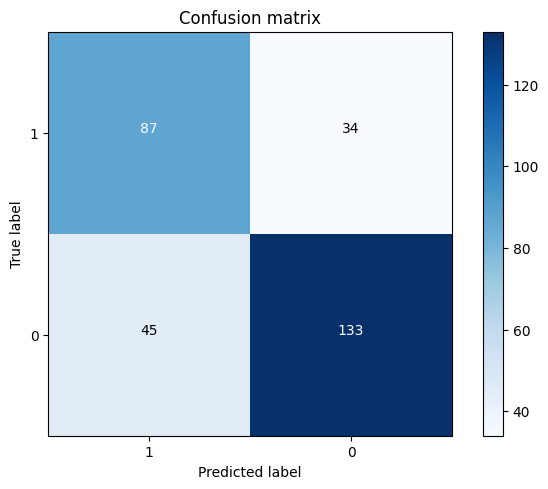

In [26]:
## 定义绘制混淆矩阵的函数
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
matrix = confusion_matrix(train_y,predict_y) #获得混淆矩阵
class_names = ['1', '0' ]
plt.figure()
plot_confusion_matrix(matrix
                      , classes=class_names
                      , title='Confusion matrix')

plt.savefig('./images/逻辑回归算法version1.0混淆矩阵.png')
plt.show()

In [27]:
## 用训练好的参数beta在测试集上进行测试
testdata = np.loadtxt('data/horseColicTest.txt')
from sklearn import preprocessing
zscore_scaler = preprocessing.StandardScaler()

test_x = testdata[:,:-1]
test_y = testdata[:,-1]
test_x1 = zscore_scaler.fit_transform(test_x)
temp_y = np.dot(beta,np.transpose(test_x1))
predict_y_test = []
for i in range(temp_y.shape[1]):
    y = sigmoid(temp_y[0,i])
    if y<=0.5:
        y_new = 0
    else:
        y_new =1
    predict_y_test.append(y_new)
predict_y_test_sklearn = lr1.predict(test_x1)
print(classification_report(predict_y_test,test_y))
print(classification_report(predict_y_test_sklearn,test_y))

              precision    recall  f1-score   support

           0       0.80      0.55      0.65        29
           1       0.72      0.89      0.80        38

    accuracy                           0.75        67
   macro avg       0.76      0.72      0.73        67
weighted avg       0.76      0.75      0.74        67

              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59        24
         1.0       0.77      0.84      0.80        43

    accuracy                           0.73        67
   macro avg       0.71      0.69      0.70        67
weighted avg       0.72      0.73      0.73        67



# 总结
经过验证，发现该数据集在sklearn 中的逻辑回归函数与自己写的逻辑回归函数的效果相差不是很大，总体表现是官网的函数优于自己的函数。自己写的
函数还可以继续优化：
- 可以使用计算效率更高的优化算法
- 可以在函数中加入正则化方法